# WeatherPy
----

### Analysis




In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
# Build partial query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold response info
cities_found= []
max_temp = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
wind_speed = []


# Loop through the list of cities and perform a request for data on each item, append to lists   
print("Beginning Data Retrieval")
print("-------------------------")
for index, city in enumerate(cities): 
    weather_json = requests.get(query_url + city).json()
    print(f"Processsing Record {index} of {len(cities)}: {city}")
#skip results for cities not found (keyerror)    
#include print log with city name & number  
    try:
        max_temp.append(weather_json["main"]["temp_max"])
        cloudiness.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        wind_speed.append(weather_json["wind"]["speed"])
        cities_found.append(weather_json["name"])
    except (KeyError, IndexError):
        pass
        print("City not found. Skipping...")
    
print("--------------------------------")
print("Data Retrieval Complete")
print("--------------------------------")
    
 
    


Beginning Data Retrieval
-------------------------
Processsing Record 0 of 613: tasiilaq
Processsing Record 1 of 613: arraial do cabo
Processsing Record 2 of 613: skotterud
Processsing Record 3 of 613: butaritari
Processsing Record 4 of 613: snezhnogorsk
Processsing Record 5 of 613: shenzhen
Processsing Record 6 of 613: tarakan
Processsing Record 7 of 613: mutare
Processsing Record 8 of 613: qaanaaq
Processsing Record 9 of 613: bethel
Processsing Record 10 of 613: aasiaat
Processsing Record 11 of 613: mahebourg
Processsing Record 12 of 613: flinders
Processsing Record 13 of 613: dir
Processsing Record 14 of 613: margate
Processsing Record 15 of 613: albany
Processsing Record 16 of 613: punta arenas
Processsing Record 17 of 613: new norfolk
Processsing Record 18 of 613: portland
Processsing Record 19 of 613: mataura
Processsing Record 20 of 613: kahului
Processsing Record 21 of 613: sosnovo-ozerskoye
Processsing Record 22 of 613: santa cruz de la palma
Processsing Record 23 of 613: mana

Processsing Record 189 of 613: qabis
City not found. Skipping...
Processsing Record 190 of 613: coahuayana
Processsing Record 191 of 613: traverse city
Processsing Record 192 of 613: nerchinskiy zavod
Processsing Record 193 of 613: katherine
Processsing Record 194 of 613: gibraleon
Processsing Record 195 of 613: nizhneyansk
City not found. Skipping...
Processsing Record 196 of 613: vestmannaeyjar
Processsing Record 197 of 613: gua musang
Processsing Record 198 of 613: haftoni
Processsing Record 199 of 613: toamasina
Processsing Record 200 of 613: kapaa
Processsing Record 201 of 613: newark
Processsing Record 202 of 613: massakory
Processsing Record 203 of 613: katsuura
Processsing Record 204 of 613: gamba
Processsing Record 205 of 613: riyadh
Processsing Record 206 of 613: puerto montt
Processsing Record 207 of 613: vila velha
Processsing Record 208 of 613: gopichettipalaiyam
City not found. Skipping...
Processsing Record 209 of 613: klaksvik
Processsing Record 210 of 613: martapura
Pr

Processsing Record 381 of 613: ilulissat
Processsing Record 382 of 613: tautira
Processsing Record 383 of 613: walvis bay
Processsing Record 384 of 613: adwa
Processsing Record 385 of 613: nha trang
Processsing Record 386 of 613: mys shmidta
City not found. Skipping...
Processsing Record 387 of 613: waipawa
Processsing Record 388 of 613: moranbah
Processsing Record 389 of 613: souillac
Processsing Record 390 of 613: havoysund
Processsing Record 391 of 613: acapulco
Processsing Record 392 of 613: hede
Processsing Record 393 of 613: panjab
Processsing Record 394 of 613: clarence town
Processsing Record 395 of 613: gasa
Processsing Record 396 of 613: pingliang
Processsing Record 397 of 613: colares
Processsing Record 398 of 613: vulcan
Processsing Record 399 of 613: yumen
Processsing Record 400 of 613: severomorsk
Processsing Record 401 of 613: high level
Processsing Record 402 of 613: comodoro rivadavia
Processsing Record 403 of 613: yenagoa
Processsing Record 404 of 613: huadian
Process

Processsing Record 575 of 613: broken hill
Processsing Record 576 of 613: tchollire
Processsing Record 577 of 613: kuala terengganu
Processsing Record 578 of 613: tondano
Processsing Record 579 of 613: raudeberg
Processsing Record 580 of 613: auce
Processsing Record 581 of 613: burns lake
Processsing Record 582 of 613: muzhi
Processsing Record 583 of 613: saint-leu
Processsing Record 584 of 613: enshi
Processsing Record 585 of 613: mbaiki
Processsing Record 586 of 613: stephenville
Processsing Record 587 of 613: nouakchott
Processsing Record 588 of 613: marshfield
Processsing Record 589 of 613: yingcheng
Processsing Record 590 of 613: bundibugyo
Processsing Record 591 of 613: westport
Processsing Record 592 of 613: fortuna
Processsing Record 593 of 613: biak
Processsing Record 594 of 613: mao
Processsing Record 595 of 613: berbera
City not found. Skipping...
Processsing Record 596 of 613: alenquer
Processsing Record 597 of 613: solnechnyy
Processsing Record 598 of 613: muyezerskiy
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
#write results to a dictionary
weather_results = {"Cities": cities_found,
           "Max Temp": max_temp,
            "Cloudiness" : cloudiness,
            "Country" : country,
            "Date": date, 
            "Humidity": humidity,
            "Lat": lat, 
            "Lng": lng,                
            "Wind Speed" : wind_speed}
# convert results to pandas dataframe
weather_df = pd.DataFrame(weather_results)

#write dataframe to csv file
weather_df.to_csv("weather_data.csv", encoding= "utf-8", index=False)

#display dataframe
weather_data.head()


,Cities,Max Temp,Cloudiness,Country,Date,Humidity,Lat,Lng,Wind Speed
0,Tasiilaq,-10.00,68,GL,1551567000,85,65.61,-37.64,1.56
1,Arraial do Cabo,27.17,92,BR,1551568889,93,-22.97,-42.02,5.21
2,Skotterud,1.67,76,NO,1551568804,99,59.98,12.12,2.60
3,Butaritari,28.02,68,KI,1551568892,100,3.07,172.79,7.01
4,Snezhnogorsk,-26.00,0,RU,1551565800,75,69.19,33.23,1.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

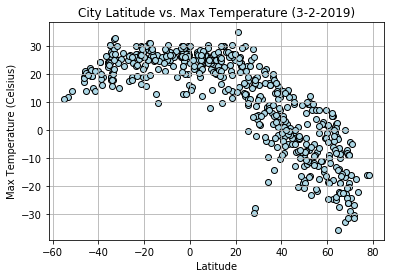

In [49]:
#plot data
import datetime
now = datetime.datetime.now()

plt.scatter(weather_df["Lat"], weather_df["Max Temp"], 
            marker = "o",
            edgecolors= "black",
            facecolor = "lightblue")

plt.title(f"City Latitude vs. Max Temperature ({now.month}-{now.day}-{now.year})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")
plt.grid(True)

plt.savefig("latvstempplot1.png")
plt.show()

#### Latitude vs. Humidity Plot

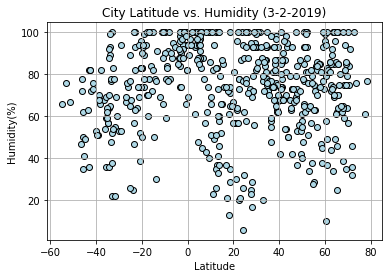

In [50]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], 
            marker = "o",
            edgecolors= "black",
            facecolor = "lightblue")

plt.title(f"City Latitude vs. Humidity ({now.month}-{now.day}-{now.year})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)
plt.savefig("latvshumidityplot2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

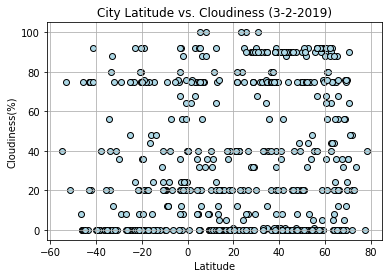

In [51]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], 
            marker = "o",
            edgecolors= "black",
            facecolor = "lightblue")

plt.title(f"City Latitude vs. Cloudiness ({now.month}-{now.day}-{now.year})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)
plt.savefig("latvscloudinessplot3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

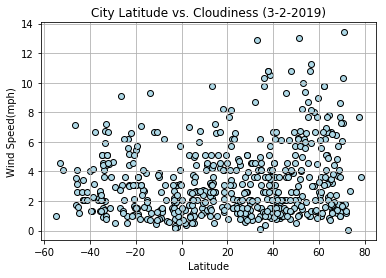

In [52]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], 
            marker = "o",
            edgecolors= "black",
            facecolor = "lightblue")

plt.title(f"City Latitude vs. Cloudiness ({now.month}-{now.day}-{now.year})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid(True)
plt.savefig("latvswindplot4.png")
plt.show()